# Dataset 3: UV-B Index vs UV Search Volume Analysis

## 목적
- 기상청 UV-B 지수와 네이버 자외선 검색량 비교
- 스키장 환경의 UV-B 보정 (고도 + 눈 반사)
- 인식 공백(Perception Gap) 분석
- 마케팅 전략 도출

## 데이터 기간
2020-02 ~ 2025-02 (5년, 월별)

## 1. 라이브러리 임포트 및 설정

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# 스타일 설정
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['axes.unicode_minus'] = False

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 2. 데이터 로드

CSV 파일 경로를 실제 경로로 수정하세요.

In [ ]:
# CSV 파일 경로 (실제 경로로 수정)
file_path = '../data/03_기상청_UV지수_vs_검색량_비교.csv'

df = pd.read_csv(file_path)
df['date'] = pd.to_datetime(df['date'])

print("="*60)
print("📊 Dataset 3: UV-B Index vs Search Volume Analysis")
print("="*60)
print(f"\nData Period: {df['date'].min().strftime('%Y-%m')} ~ {df['date'].max().strftime('%Y-%m')}")
print(f"Total Months: {len(df)}")
print(f"\nColumns: {', '.join(df.columns.tolist())}")

# 데이터 샘플 확인
df.head()

📊 Dataset 3: UV-B Index vs Search Volume Analysis

Data Period: 2020-02 ~ 2025-02
Total Months: 61

Columns: date, 자외선, 자외선차단, UV차단, 자외선검색지수, UVB평균, UVB최대, UVB최소, 수집일수, 커버리지, api_success, year, month, season


,date,자외선,자외선차단,UV차단,자외선검색지수,UVB평균,UVB최대,UVB최소,수집일수,커버리지,api_success,year,month,season
0,2020-02-01,33.70663,17.64912,72.46680,41.274183,2.39,3.65,0.41,29,100.0,True,2020,2,겨울
1,2020-03-01,51.96927,34.57894,64.64011,50.396107,3.85,5.76,1.00,31,100.0,True,2020,3,기타
2,2020-04-01,62.40021,44.00000,61.35569,55.918633,4.89,6.84,1.93,30,100.0,True,2020,4,기타
3,2020-05-01,79.65268,65.26315,67.22571,70.713847,5.50,8.23,1.13,30,96.8,True,2020,5,기타
4,2020-06-01,100.00000,76.57894,90.07686,88.885267,6.12,8.21,2.13,30,100.0,True,2020,6,여름


## 3. 스키장 UV-B 보정 계산

### 과학적 근거
1. **고도 보정**: WHO 가이드라인에 따르면 고도 1000m당 UV 10-12% 증가
2. **눈 반사**: 눈의 UV-B 알베도(반사율) 80-90%
3. **총 효과**: 고도 보정 × 반사 보정 = 약 2.07배

### 적용 공식
```
스키장 UV-B = 평지 UV-B × 1.12 × 1.85 = 평지 UV-B × 2.07
```

In [5]:
print("="*60)
print("🎿 Ski Resort UV-B Correction Formula")
print("="*60)

# 보정 계수 정의
ALTITUDE_CORRECTION = 1.12   # 고도 1000m: +12% (WHO 가이드라인)
SNOW_REFLECTION = 1.85       # 눈 반사: +85% (UV-B 알베도)
TOTAL_CORRECTION = ALTITUDE_CORRECTION * SNOW_REFLECTION  # 2.07배

print(f"""
📐 Scientific Basis:
   1. Altitude Correction: {ALTITUDE_CORRECTION:.2f}x
      - WHO Guide: UV increases 10-12% per 1000m altitude
      - Korean Ski Resorts Avg Altitude: 1,000~1,200m
      
   2. Snow Reflection: {SNOW_REFLECTION:.2f}x
      - Snow UV-B Albedo: 80-90%
      - Additional exposure from reflected light (bottom→up)
      
   3. Total Correction: {TOTAL_CORRECTION:.2f}x
      - Ski resort actual exposure = 2x+ of flatland!
""")

# 스키장 UV-B 계산
df['UVB_SkiResort'] = df['UVB평균'] * TOTAL_CORRECTION
df['UVB_SkiResort'] = df['UVB_SkiResort'].round(2)

print("✅ Ski Resort UV-B column added!")

# 샘플 데이터 확인
print("\n📋 Correction Result Sample (Winter):")
winter_sample = df[df['season'] == '겨울'][['date', 'UVB평균', 'UVB_SkiResort', '자외선검색지수']].head(5)
winter_sample.columns = ['Date', 'UVB_Flatland', 'UVB_SkiResort', 'Search_Index']
print(winter_sample.to_string(index=False))

🎿 Ski Resort UV-B Correction Formula

📐 Scientific Basis:
   1. Altitude Correction: 1.12x
      - WHO Guide: UV increases 10-12% per 1000m altitude
      - Korean Ski Resorts Avg Altitude: 1,000~1,200m

   2. Snow Reflection: 1.85x
      - Snow UV-B Albedo: 80-90%
      - Additional exposure from reflected light (bottom→up)

   3. Total Correction: 2.07x
      - Ski resort actual exposure = 2x+ of flatland!

✅ Ski Resort UV-B column added!

📋 Correction Result Sample (Winter):
      Date  UVB_Flatland  UVB_SkiResort  Search_Index
2020-02-01          2.39           4.95     41.274183
2020-12-01          1.79           3.71     29.406807
2021-01-01          1.84           3.81     26.172397
2021-02-01          2.63           5.45     26.733817
2021-12-01          1.43           2.96     21.595647


## 4. 계절별 통계 분석

겨울(12,1,2월), 여름(6,7,8월), 기타 계절별로 UV-B 지수와 검색량을 비교합니다.

In [6]:
print("="*60)
print("📈 Seasonal Statistics Analysis")
print("="*60)

# 계절별 평균
season_stats = df.groupby('season').agg({
    '자외선검색지수': 'mean',
    'UVB평균': 'mean',
    'UVB_SkiResort': 'mean'
}).round(2)

season_stats.columns = ['Search_Index', 'UVB_Flatland', 'UVB_SkiResort']
season_stats.index.name = 'Season'

print("\nSeasonal Averages:")
print(season_stats)

# 겨울/여름 비교
winter_stats = df[df['season'] == '겨울'].agg({
    '자외선검색지수': 'mean',
    'UVB평균': 'mean',
    'UVB_SkiResort': 'mean'
})

summer_stats = df[df['season'] == '여름'].agg({
    '자외선검색지수': 'mean',
    'UVB평균': 'mean',
    'UVB_SkiResort': 'mean'
})

print("\n" + "="*60)
print("❄️ vs ☀️ Winter vs Summer Detailed Comparison")
print("="*60)

print(f"""
【UV Search Volume】
Winter: {winter_stats['자외선검색지수']:.2f}
Summer: {summer_stats['자외선검색지수']:.2f}
Ratio:  {(winter_stats['자외선검색지수']/summer_stats['자외선검색지수']*100):.1f}%

【UV-B Index (Flatland)】
Winter: {winter_stats['UVB평균']:.2f}
Summer: {summer_stats['UVB평균']:.2f}
Ratio:  {(winter_stats['UVB평균']/summer_stats['UVB평균']*100):.1f}%

【UV-B Index (Ski Resort Corrected)】
Winter: {winter_stats['UVB_SkiResort']:.2f}
Summer: {summer_stats['UVB평균']:.2f}
Ratio:  {(winter_stats['UVB_SkiResort']/summer_stats['UVB평균']*100):.1f}%
""")

📈 Seasonal Statistics Analysis

Seasonal Averages:
        Search_Index  UVB_Flatland  UVB_SkiResort
Season                                           
겨울             25.65          1.87           3.88
기타             47.02          3.98           8.25
여름             69.64          5.36          11.11

❄️ vs ☀️ Winter vs Summer Detailed Comparison

【UV Search Volume】
Winter: 25.65
Summer: 69.64
Ratio:  36.8%

【UV-B Index (Flatland)】
Winter: 1.87
Summer: 5.36
Ratio:  35.0%

【UV-B Index (Ski Resort Corrected)】
Winter: 3.88
Summer: 5.36
Ratio:  72.4%



## 5. 인식 공백(Perception Gap) 분석

### Gap 계산 방법
```
Gap = UV 위험도 비율 - 검색 인식 비율
```

- **Positive Gap (+)**: 실제 위험도보다 인식이 낮음 → 교육 기회
- **Negative Gap (-)**: 실제 위험도보다 인식이 높음 → 과잉 인식
- **Near Zero**: 적절한 인식 수준

In [7]:
print("="*60)
print("💡 Perception Gap Analysis")
print("="*60)

# Gap 계산
search_ratio = (winter_stats['자외선검색지수'] / summer_stats['자외선검색지수'] * 100)
uv_flatland_ratio = (winter_stats['UVB평균'] / summer_stats['UVB평균'] * 100)
uv_ski_ratio = (winter_stats['UVB_SkiResort'] / summer_stats['UVB평균'] * 100)

gap_flatland = uv_flatland_ratio - search_ratio
gap_ski = uv_ski_ratio - search_ratio

print(f"""
【Flatland Scenario】
UV Ratio:     {uv_flatland_ratio:.1f}% (Winter/Summer)
Search Ratio: {search_ratio:.1f}% (Winter/Summer)
Gap:          {gap_flatland:+.1f}%p

→ {'Perception > Reality' if gap_flatland < 0 else 'Perception < Reality'}

【Ski Resort Scenario】⭐
UV Ratio:     {uv_ski_ratio:.1f}% (Ski Winter/Flatland Summer)
Search Ratio: {search_ratio:.1f}% (Winter/Summer)
Gap:          {gap_ski:+.1f}%p

→ {'Appropriate Awareness' if abs(gap_ski) < 10 else 'Clear Perception Gap!'}
""")

# Gap 해석
if gap_ski > 20:
    interpretation = "✅✅ SEVERE PERCEPTION GAP! Ski resorts are as dangerous as summer, but people underestimate!"
elif gap_ski > 10:
    interpretation = "✅ Clear perception gap exists. Educational campaign needed!"
elif gap_ski > -10:
    interpretation = "ℹ️ Appropriate awareness level. Minor adjustment possible."
else:
    interpretation = "⚠️ Over-awareness. Different approach needed."

print(f"\n🎯 Strategic Direction: {interpretation}")

# Gap 요약 테이블
gap_summary = pd.DataFrame({
    'Scenario': ['Flatland', 'Ski Resort'],
    'UV_Ratio_%': [uv_flatland_ratio, uv_ski_ratio],
    'Search_Ratio_%': [search_ratio, search_ratio],
    'Gap_%p': [gap_flatland, gap_ski]
}).round(1)

print("\n📊 Gap Summary Table:")
print(gap_summary.to_string(index=False))

💡 Perception Gap Analysis

【Flatland Scenario】
UV Ratio:     35.0% (Winter/Summer)
Search Ratio: 36.8% (Winter/Summer)
Gap:          -1.9%p

→ Perception > Reality

【Ski Resort Scenario】⭐
UV Ratio:     72.4% (Ski Winter/Flatland Summer)
Search Ratio: 36.8% (Winter/Summer)
Gap:          +35.6%p

→ Clear Perception Gap!


🎯 Strategic Direction: ✅✅ SEVERE PERCEPTION GAP! Ski resorts are as dangerous as summer, but people underestimate!

📊 Gap Summary Table:
  Scenario  UV_Ratio_%  Search_Ratio_%  Gap_%p
  Flatland        35.0            36.8    -1.9
Ski Resort        72.4            36.8    35.6


## 6. 시각화 1: 시계열 그래프

UV-B 지수와 검색량의 시간에 따른 변화를 비교합니다.
- 상단: UV-B 지수 (평지 vs 스키장)
- 하단: 자외선 검색량
- 겨울 영역은 파란색으로 하이라이트

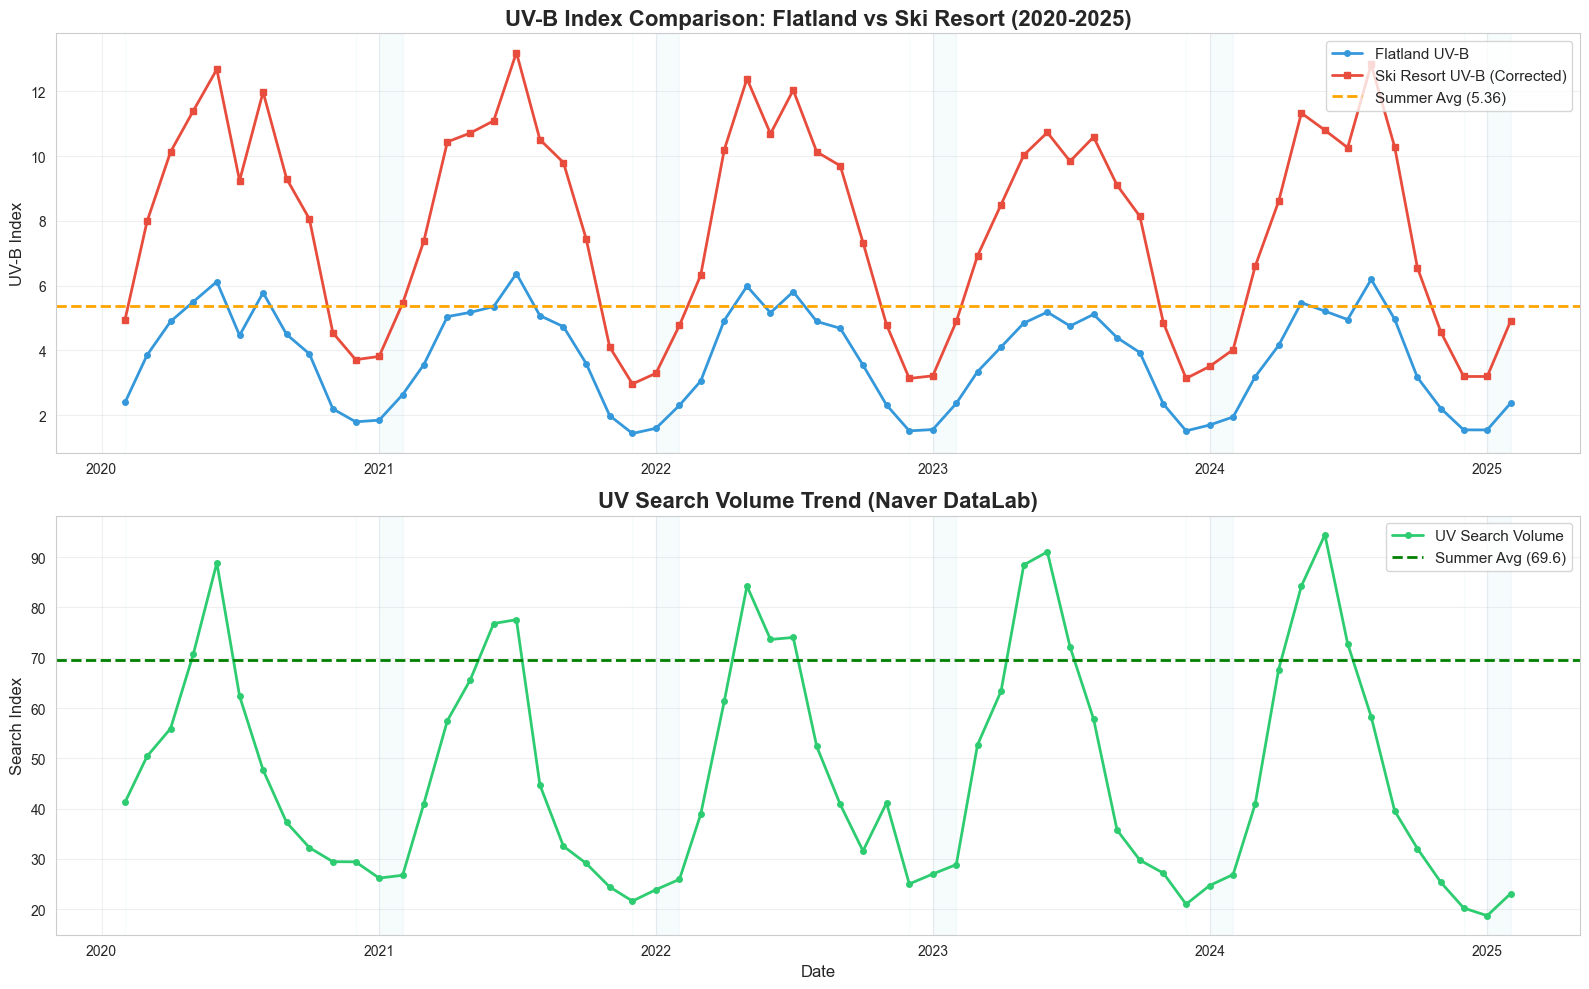

✅ Time series chart saved: chart1_timeseries.png


In [8]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# 상단: UV-B 지수 비교
ax1 = axes[0]
ax1.plot(df['date'], df['UVB평균'], 
         label='Flatland UV-B', color='#3498db', linewidth=2, marker='o', markersize=4)
ax1.plot(df['date'], df['UVB_SkiResort'], 
         label='Ski Resort UV-B (Corrected)', color='#e74c3c', linewidth=2, marker='s', markersize=4)
ax1.axhline(y=summer_stats['UVB평균'], color='orange', linestyle='--', 
            linewidth=2, label=f'Summer Avg ({summer_stats["UVB평균"]:.2f})')

ax1.set_title('UV-B Index Comparison: Flatland vs Ski Resort (2020-2025)', 
              fontsize=16, fontweight='bold')
ax1.set_ylabel('UV-B Index', fontsize=12)
ax1.legend(fontsize=11, loc='upper right')
ax1.grid(True, alpha=0.3)

# 겨울 영역 하이라이트
for year in df['year'].unique():
    winter_months = df[(df['year'] == year) & (df['month'].isin([12]))]
    if len(winter_months) > 0:
        ax1.axvspan(winter_months['date'].min(), winter_months['date'].max(), 
                    alpha=0.1, color='lightblue')
    
    winter_months = df[(df['year'] == year) & (df['month'].isin([1, 2]))]
    if len(winter_months) > 0:
        ax1.axvspan(winter_months['date'].min(), winter_months['date'].max(), 
                    alpha=0.1, color='lightblue')

# 하단: 자외선 검색량
ax2 = axes[1]
ax2.plot(df['date'], df['자외선검색지수'], 
         label='UV Search Volume', color='#2ecc71', linewidth=2, marker='o', markersize=4)
ax2.axhline(y=summer_stats['자외선검색지수'], color='green', linestyle='--', 
            linewidth=2, label=f'Summer Avg ({summer_stats["자외선검색지수"]:.1f})')

ax2.set_title('UV Search Volume Trend (Naver DataLab)', fontsize=16, fontweight='bold')
ax2.set_xlabel('Date', fontsize=12)
ax2.set_ylabel('Search Index', fontsize=12)
ax2.legend(fontsize=11, loc='upper right')
ax2.grid(True, alpha=0.3)

# 겨울 영역 하이라이트
for year in df['year'].unique():
    winter_months = df[(df['year'] == year) & (df['month'].isin([12]))]
    if len(winter_months) > 0:
        ax2.axvspan(winter_months['date'].min(), winter_months['date'].max(), 
                    alpha=0.1, color='lightblue')
    
    winter_months = df[(df['year'] == year) & (df['month'].isin([1, 2]))]
    if len(winter_months) > 0:
        ax2.axvspan(winter_months['date'].min(), winter_months['date'].max(), 
                    alpha=0.1, color='lightblue')

plt.tight_layout()
plt.savefig('chart1_timeseries.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Time series chart saved: chart1_timeseries.png")

## 7. 시각화 2: 겨울/여름 비교 막대 차트

겨울과 여름의 UV-B 지수 및 검색량을 직접 비교합니다.

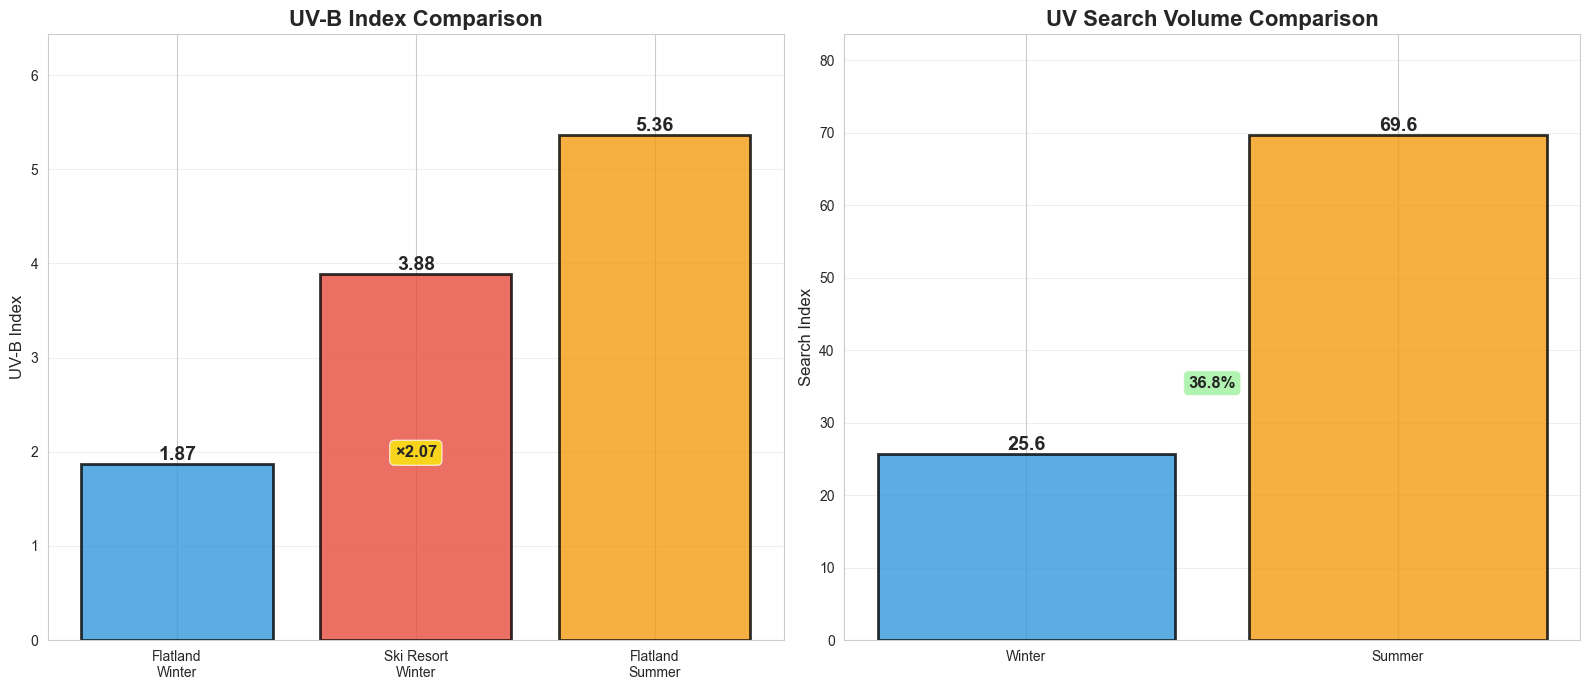

✅ Comparison bar chart saved: chart2_comparison.png


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# 좌측: UV-B 지수 비교
ax1 = axes[0]
categories = ['Flatland\nWinter', 'Ski Resort\nWinter', 'Flatland\nSummer']
values = [
    winter_stats['UVB평균'],
    winter_stats['UVB_SkiResort'],
    summer_stats['UVB평균']
]
colors = ['#3498db', '#e74c3c', '#f39c12']

bars1 = ax1.bar(categories, values, color=colors, alpha=0.8, edgecolor='black', linewidth=2)

# 값 라벨 추가
for bar, val in zip(bars1, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.2f}',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

ax1.set_title('UV-B Index Comparison', fontsize=16, fontweight='bold')
ax1.set_ylabel('UV-B Index', fontsize=12)
ax1.set_ylim(0, max(values) * 1.2)
ax1.grid(axis='y', alpha=0.3)

# 보정 계수 표시
ax1.text(1, winter_stats['UVB_SkiResort'] * 0.5, 
         f'×{TOTAL_CORRECTION:.2f}',
         ha='center', fontsize=12, fontweight='bold', 
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

# 우측: 검색량 비교
ax2 = axes[1]
categories2 = ['Winter', 'Summer']
values2 = [
    winter_stats['자외선검색지수'],
    summer_stats['자외선검색지수']
]
colors2 = ['#3498db', '#f39c12']

bars2 = ax2.bar(categories2, values2, color=colors2, alpha=0.8, edgecolor='black', linewidth=2)

# 값 라벨 추가
for bar, val in zip(bars2, values2):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height,
             f'{val:.1f}',
             ha='center', va='bottom', fontsize=14, fontweight='bold')

ax2.set_title('UV Search Volume Comparison', fontsize=16, fontweight='bold')
ax2.set_ylabel('Search Index', fontsize=12)
ax2.set_ylim(0, max(values2) * 1.2)
ax2.grid(axis='y', alpha=0.3)

# 비율 표시
ratio_text = f'{search_ratio:.1f}%'
ax2.text(0.5, max(values2) * 0.5, 
         ratio_text,
         ha='center', fontsize=12, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

plt.tight_layout()
plt.savefig('chart2_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Comparison bar chart saved: chart2_comparison.png")

## 8. 시각화 3: Gap 분석 차트

UV 위험도와 검색 인식의 차이(Gap)를 시각화합니다.

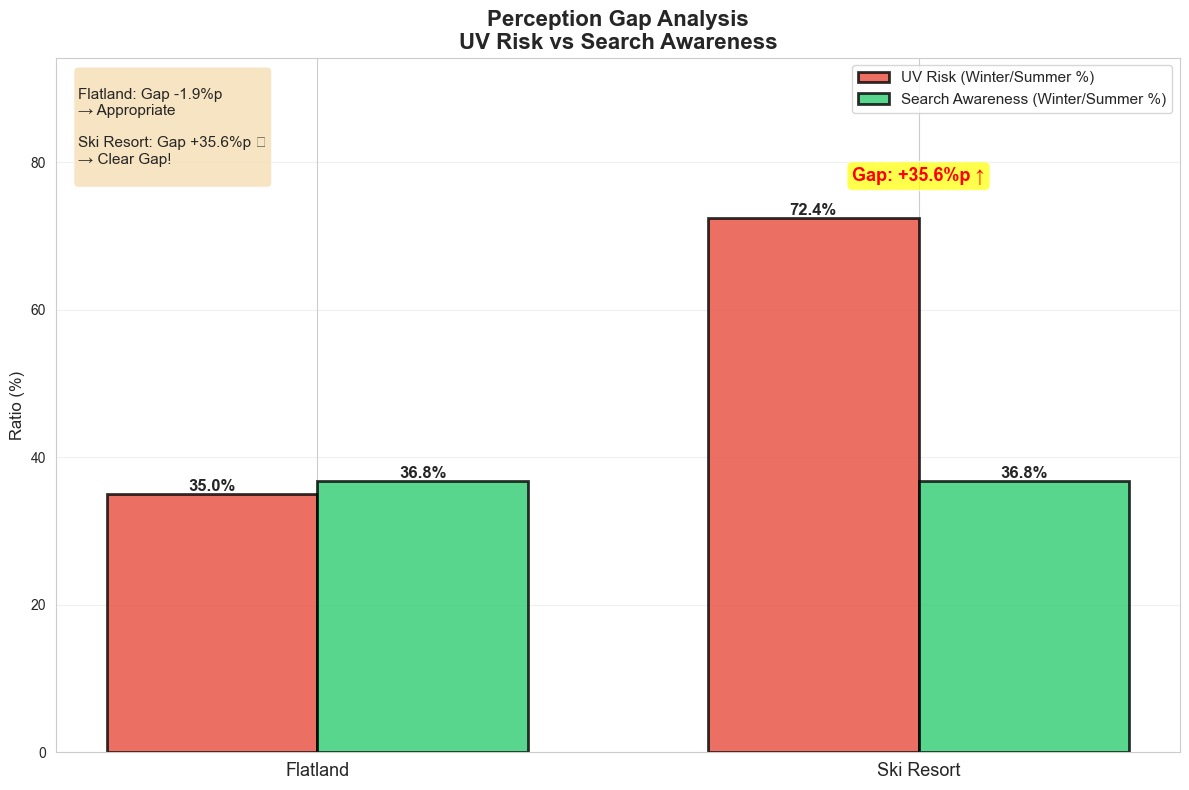

✅ Gap analysis chart saved: chart3_gap_analysis.png


In [10]:
fig, ax = plt.subplots(figsize=(12, 8))

# 데이터 준비
scenarios = ['Flatland', 'Ski Resort']
uv_ratios = [uv_flatland_ratio, uv_ski_ratio]
search_ratios_list = [search_ratio, search_ratio]
gaps = [gap_flatland, gap_ski]

x = np.arange(len(scenarios))
width = 0.35

# 막대 그래프
bars1 = ax.bar(x - width/2, uv_ratios, width, label='UV Risk (Winter/Summer %)', 
               color='#e74c3c', alpha=0.8, edgecolor='black', linewidth=2)
bars2 = ax.bar(x + width/2, search_ratios_list, width, label='Search Awareness (Winter/Summer %)', 
               color='#2ecc71', alpha=0.8, edgecolor='black', linewidth=2)

# 값 라벨
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.1f}%',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Gap 화살표 및 텍스트
for i, (scenario, gap) in enumerate(zip(scenarios, gaps)):
    if abs(gap) > 5:
        arrow_y = max(uv_ratios[i], search_ratios_list[i]) + 5
        arrow_color = 'red' if gap > 0 else 'blue'
        arrow_direction = '↑' if gap > 0 else '↓'
        
        ax.annotate(f'Gap: {gap:+.1f}%p {arrow_direction}',
                   xy=(i, arrow_y), fontsize=13, fontweight='bold',
                   ha='center', color=arrow_color,
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax.set_title('Perception Gap Analysis\nUV Risk vs Search Awareness', 
             fontsize=16, fontweight='bold')
ax.set_ylabel('Ratio (%)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(scenarios, fontsize=13)
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, max(uv_ratios + search_ratios_list) * 1.3)

# 해석 텍스트
interpretation_text = f"""
Flatland: Gap {gap_flatland:+.1f}%p
→ {'Over-awareness' if gap_flatland < -10 else 'Appropriate' if abs(gap_flatland) < 10 else 'Under-awareness'}

Ski Resort: Gap {gap_ski:+.1f}%p ⭐
→ {'Over-awareness' if gap_ski < -10 else 'Appropriate' if abs(gap_ski) < 10 else 'Clear Gap!'}
"""

ax.text(0.02, 0.98, interpretation_text,
        transform=ax.transAxes, fontsize=11,
        verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.savefig('chart3_gap_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Gap analysis chart saved: chart3_gap_analysis.png")

## 9. 시각화 4: 월별 히트맵

연도와 월에 따른 UV-B 지수와 검색량의 패턴을 히트맵으로 표현합니다.

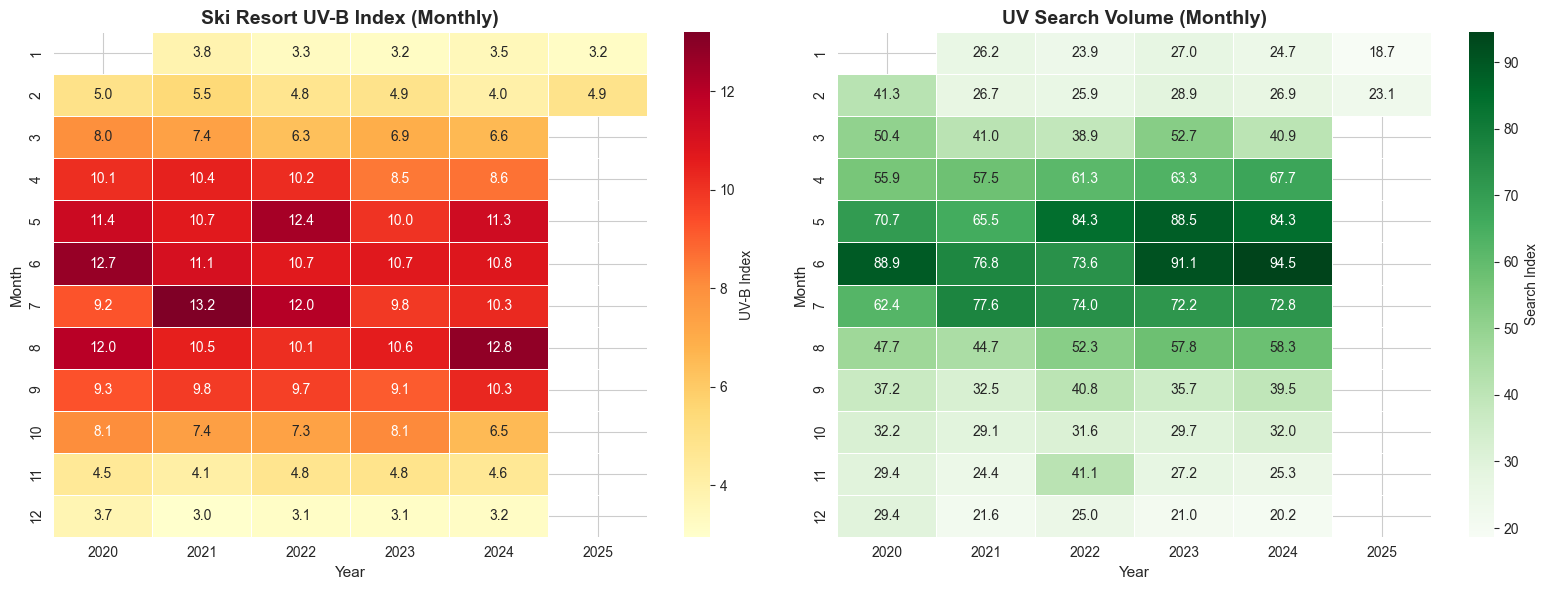

✅ Monthly heatmap saved: chart4_heatmap.png


In [11]:
# 피벗 테이블 생성
pivot_uv = df.pivot_table(values='UVB_SkiResort', index='month', columns='year', aggfunc='mean')
pivot_search = df.pivot_table(values='자외선검색지수', index='month', columns='year', aggfunc='mean')

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 좌측: UV-B 스키장 히트맵
sns.heatmap(pivot_uv, annot=True, fmt='.1f', cmap='YlOrRd', 
            cbar_kws={'label': 'UV-B Index'}, ax=axes[0], linewidths=0.5)
axes[0].set_title('Ski Resort UV-B Index (Monthly)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('Month', fontsize=11)

# 우측: 검색량 히트맵
sns.heatmap(pivot_search, annot=True, fmt='.1f', cmap='Greens', 
            cbar_kws={'label': 'Search Index'}, ax=axes[1], linewidths=0.5)
axes[1].set_title('UV Search Volume (Monthly)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Year', fontsize=11)
axes[1].set_ylabel('Month', fontsize=11)

plt.tight_layout()
plt.savefig('chart4_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Monthly heatmap saved: chart4_heatmap.png")

## 10. 발표용 인사이트 정리

분석 결과를 마케팅 전략에 활용 가능한 인사이트로 정리합니다.

In [12]:
print("="*60)
print("📊 Key Insights for Presentation")
print("="*60)

insights = f"""
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
【Dataset 3 핵심 발견】

1️⃣ 평지 겨울은 실제로 UV가 낮음
   • UV-B Index: {winter_stats['UVB평균']:.2f} (여름의 {uv_flatland_ratio:.0f}%)
   • Search Awareness: {search_ratio:.0f}% of summer
   • → Flatland perception is relatively accurate

2️⃣ 하지만 스키장은 완전히 다른 환경! ⭐
   
   【Scientific Basis】
   • Altitude 1000m: UV +12% (WHO Guide)
   • Snow Reflection: UV +85% (Albedo Effect)
   • Total Correction: ×{TOTAL_CORRECTION:.2f}
   
   【Actual Risk】
   • Ski Resort Winter UV: {winter_stats['UVB_SkiResort']:.2f}
   • Flatland Summer UV: {summer_stats['UVB평균']:.2f}
   • Ratio: {uv_ski_ratio:.0f}%
   
   【Perception Gap】
   • UV Risk: {uv_ski_ratio:.0f}% of summer
   • Search Awareness: {search_ratio:.0f}% of summer
   • Gap: {gap_ski:+.0f}%p
   
   → Ski resorts are as dangerous as summer,
      but people underestimate due to winter season!

3️⃣ Additional Risk Factors
   • Long exposure: 6~8 hours (3~4x daily life)
   • Reflected light: Double exposure (top+bottom)
   • Clear weather: No cloud protection
   
   → Cumulative exposure may exceed summer!

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

【Marketing Strategy Implications】

✅ Target: "Ski resorts are exceptionally dangerous environments"
   
✅ Message:
   "Winter season, but ski resorts are as dangerous as summer"
   "Altitude + Snow reflection = 2x+ UV exposure"
   "Long hours + Double exposure = Extreme environment"

✅ Educational Content:
   1. UV science at ski resorts (altitude/reflection)
   2. Actual measurement data (KMA)
   3. Skin burn risk cases
   4. Need for specialized sunscreen

✅ Product Differentiation:
   "Ski Resort Specialized" High-SPF Sunscreen
   Cold-resistant + Water-resistant + High-protection
   
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

【4-Step Presentation Structure】

Dataset 1: Winter sunscreen market exists ✓
Dataset 2: Skiing is the optimal channel ✓
Dataset 3: Ski resort UV risk vs Low awareness ✓
Dataset 4: Target segment definition (Next)

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
"""

print(insights)

# 인사이트 파일로 저장
with open('dataset3_insights.txt', 'w', encoding='utf-8') as f:
    f.write(insights)

print("✅ Insights saved: dataset3_insights.txt")

📊 Key Insights for Presentation

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
【Dataset 3 핵심 발견】

1️⃣ 평지 겨울은 실제로 UV가 낮음
   • UV-B Index: 1.87 (여름의 35%)
   • Search Awareness: 37% of summer
   • → Flatland perception is relatively accurate

2️⃣ 하지만 스키장은 완전히 다른 환경! ⭐

   【Scientific Basis】
   • Altitude 1000m: UV +12% (WHO Guide)
   • Snow Reflection: UV +85% (Albedo Effect)
   • Total Correction: ×2.07

   【Actual Risk】
   • Ski Resort Winter UV: 3.88
   • Flatland Summer UV: 5.36
   • Ratio: 72%

   【Perception Gap】
   • UV Risk: 72% of summer
   • Search Awareness: 37% of summer
   • Gap: +36%p

   → Ski resorts are as dangerous as summer,
      but people underestimate due to winter season!

3️⃣ Additional Risk Factors
   • Long exposure: 6~8 hours (3~4x daily life)
   • Reflected light: Double exposure (top+bottom)
   • Clear weather: No cloud protection

   → Cumulative exposure may exceed summer!

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

【Marketing Strategy Implications】

## 11. 분석 데이터 저장

스키장 보정 값이 포함된 완성 데이터를 CSV로 저장합니다.

In [ ]:
import os

# 출력 폴더 생성
output_dir = 'data/presentation'
os.makedirs(output_dir, exist_ok=True)

# 보정된 데이터 저장
output_file = os.path.join(output_dir, '03_UV지수_검색량_분석완료.csv')
df.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"✅ Analyzed data saved: {output_file}")

print("\n" + "="*60)
print("🎉 Dataset 3 Analysis Complete!")
print("="*60)
print("""
Generated Files:
1. chart1_timeseries.png         - Time series chart
2. chart2_comparison.png          - Winter/Summer comparison
3. chart3_gap_analysis.png        - Gap analysis
4. chart4_heatmap.png             - Monthly heatmap
5. dataset3_insights.txt          - Key insights summary
6. 03_UV지수_검색량_분석완료.csv    - Corrected data

→ Ready for presentation!
""")

## 12. 요약 통계

최종 분석 결과를 한눈에 확인할 수 있는 요약 테이블입니다.

In [ ]:
# 최종 요약 테이블
summary_table = pd.DataFrame({
    'Metric': [
        'Winter UV-B (Flatland)',
        'Winter UV-B (Ski Resort)',
        'Summer UV-B (Flatland)',
        'Winter Search Index',
        'Summer Search Index',
        'Ski/Summer UV Ratio',
        'Winter/Summer Search Ratio',
        'Perception Gap (Ski Resort)'
    ],
    'Value': [
        f"{winter_stats['UVB평균']:.2f}",
        f"{winter_stats['UVB_SkiResort']:.2f}",
        f"{summer_stats['UVB평균']:.2f}",
        f"{winter_stats['자외선검색지수']:.2f}",
        f"{summer_stats['자외선검색지수']:.2f}",
        f"{uv_ski_ratio:.1f}%",
        f"{search_ratio:.1f}%",
        f"{gap_ski:+.1f}%p"
    ]
})

print("\n📊 Summary Statistics:")
print(summary_table.to_string(index=False))

# 데이터 품질 체크
print("\n✅ Data Quality Check:")
print(f"Total Records: {len(df)}")
print(f"Missing Values: {df.isnull().sum().sum()}")
print(f"Date Range: {df['date'].min().date()} to {df['date'].max().date()}")
print(f"Average Coverage: {df['커버리지'].mean():.1f}%")